## Day Job Notebook

From time to time we are obliged to take "day jobs" that interfere with our work in the field of mathematics. The content on this notebook is from my day job which involves helping Researchers at the University of Washington and related organizations. 

## Installs

The following cell installs Python libraries used below that are not part of the default Anaconda package.

In [5]:
!conda install hdf4 -y
!conda install netCDF4 -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda2_410:

The following packages will be UPDATED:

    hdf4:     4.2.11-0     --> 4.2.12-0    

The following packages will be DOWNGRADED due to dependency conflicts:

    graphviz: 2.38.0-4     --> 2.38.0-2    
    jpeg:     9b-0         --> 8d-2        
    libtiff:  4.0.6-3      --> 4.0.6-2     
    pillow:   4.0.0-py27_1 --> 3.4.2-py27_0

jpeg-8d-2.tar. 100% |################################| Time: 0:00:00   6.04 MB/s | ETA:  0:00:00   4.24 MB/s MB/s
hdf4-4.2.12-0. 100% |################################| Time: 0:00:00  10.35 MB/s | Time: 0:00:00   9.33 MB/s
libtiff-4.0.6- 100% |################################| Time: 0:00:00  14.10 MB/s MB/s 13.29 MB/s
pillow-3.4.2-p 100% |################################| Time: 0:00:00  13.81 MB/s | Time: 0:00:00  11.84 MB/s
graphviz-2.38. 100% |################################| Time: 0:00:00  41.40 MB/s 26.50 MB

## Simple API Client using Python

In [1]:
import urllib2
import time

def dif(calltype, date1, date2, station):
    baseAPI = 'https://araldif.azurewebsites.net/api/'
    apiExtension = calltype + '?' + 'start=' + date1 + '&' + 'end=' + date2 + '&' + 'station=' + station + '&'
    api_call = baseAPI + apiExtension
    print api_call
    t1 = time.time()
    u = urllib2.urlopen(api_call)
    t2 = time.time()
    data = u.read()
    t3 = time.time()
    print 'URL open required', t2 - t1, 'seconds; read() required', t3 - t2, 'seconds'
    return data

data = dif('gethydrograph', '1995-01-01', '2000-12-31', 'UCHKU')
print data[0:198]

https://araldif.azurewebsites.net/api/gethydrograph?start=1995-01-01&end=2000-12-31&station=UCHKU&
URL open required 11.6526591778 seconds; read() required 0.0836868286133 seconds
DATE,FLOW
1995-01-01,93.787209
1995-01-02,90.740631
1995-01-03,87.948059
1995-01-04,85.219681
1995-01-05,82.500687
1995-01-06,79.934334
1995-01-07,77.52166
1995-01-08,75.218941
1995-01-09,73.028778



In [ ]:
# Do not run this cell; it is an alternative version that does not work!
import urllib2
import time

def dif(calltype, boundingbox):
    baseAPI = 'http://www.waterqualitydata.us/Station/'
    apiExtension = calltype + '?' + boundingbox
    api_call = baseAPI + apiExtension
    print api_call
    t1 = time.time()
    u = urllib2.urlopen(api_call)
    t2 = time.time()
    data = u.read()
    t3 = time.time()
    print 'URL open required', t2 - t1, 'seconds; read() required', t3 - t2, 'seconds'
    return data

data = dif('search', 'bBox=-122.4,47.5,-122.0,47.9')
print data[0:198]

## HIPAA pseudo-PHI generator

In [1]:
# 100 people (all named John) live in a small town with one doctor. They appeared in this town
#   on October 30, 1938 all at once. Every day or two one of them at random visits the doctor
#   where his vital signs are recorded: Blood pressure (two numbers), respiration rate, heart rate,
#   blood oxygen saturation, body temperature (deg F) and weight (pounds). The doctor also asks
#   'Since your last visit how many albums have you purchased by Count Basie? By T-Pain? By the 
#    Dead Kennedys?' This process generates a 10,000 row time-series database over 41 years. 
#
# The code below builds 3 tables (each being a list of lists) and these are written to CSV files.
#   The following are some notes on these tables and related parameters.
#
#  Tstudy is the first day of study data, morning of October 30 1938
#  Tborn is the latest possible date of birth, Dec 31 1922 (so all participants are 16 or older)
#    However all participants give their DOB as August 26 1920.
#
# The Python random number generator is given a fixed seed so that this code always generates the 
#   same patient history.
#
#  1. patient table p: Surname, Given Name, DOB, (height feet, inches), patient ID
#  2. patient parameters pp: for internal use
#  3. time series data ts: Across all patients
#

import datetime
import random as r
import csv

Tborn = datetime.datetime(1922,12,31,0,0,0)
Tstudy = datetime.datetime(1938,10,30,0,0,0)

pName = 'patients.csv'
ppName = 'patientParameters.csv'
tsName = 'timeseries.csv'

# Keep results reproducible using a fixed random number seed
r.seed(31415)

lc = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
uc = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

def RandLastName():
    return uc[r.randint(0,25)]+lc[r.randint(0,25)]+lc[r.randint(0,25)]+lc[r.randint(0,25)]

def cmtoftin(ncm):
    if ncm < 50*2.54: return {5,8}
    nin = ncm / 2.54
    nft = int(nin/12)
    nin = int(nin - 12*nft)
    return (nft, nin)

def ftintocm(height):
    height_in = height[0]*12 + height[1]
    return int(height_in*2.54)

def someheight():
    hgtLow = 157
    hgtHi = 198     # from 5 foot 2 to 6 foot 6
    return cmtoftin(r.randint(hgtLow, hgtHi))

sysMin = 90
sysMax = 129
diaMin = 60
diaMax = 84
rrMin = 10
rrMax = 20
hrMin = 40
hrMax = 100
osMin = 95.0
osMax = 99.0
btMin = 97.0
btMax = 99.1
mMin = 98
mMax = 280

def ModelBaseE(hr, sys, dia, bmi):
    if hr > 58 and hr < 62 and sys-dia > 30 and bmi < 22: return 1
    return 0

def ModelTPain(rr, os, height): 
    return float(rr) + 2.0*(os-95.0)+0.2*(ftintocm(height)-157)

def ModelDK(weight, bt):
    if weight < 150 and bt < 97.4: return 1
    return 0

def RandomSystolic(a,b):
    return r.randint(a,b)

def RandomDiastolic(a,b):
    return r.randint(a,b)

def RandomRespirationRate(a,b):
    return r.randint(a,b) 

def RandomHeartRate(a,b):
    return r.randint(a,b) 

def RandomOxygenSaturation(a,b):
    return r.uniform(a,b)

def RandomBodyTemperature(a,b):
    return r.uniform(a,b)

def RandomMass(a,b):
    return r.randint(a,b)

def BMI(height,mass):
    height_in = height[0]*12+height[1]
    return 703.0*mass/(height_in*height_in)

nPatients = 100
bornDay = datetime.datetime(1920,8,26,8,30,12)
p=[]
pHdr = []
pp=[]
ppHdr=[]

pSurnameIndex = 0
pFirstNameIndex = 1
pDOBIndex = 2
pHeightIndex = 3
pIDIndex = 4

pHdr.append(['Surname','Given name', 'DOB', 'height', 'ID'])
p.append(['Bigboote','John',bornDay,someheight(),0])
p.append(['Yaya','John',bornDay,someheight(),1])
p.append(['Smallberries','John',bornDay,someheight(),2])
p.append(['Parker','John',bornDay,someheight(),3])
p.append(['Whorfin','John',bornDay,someheight(),4])
p.append(['Valuk','John',bornDay,someheight(),5])
p.append(['Gomez','John',bornDay,someheight(),6])
p.append(['OConnor','John',bornDay,someheight(),7])
p.append(['Emdall','John',bornDay,someheight(),8])
p.append(['Gant','John',bornDay,someheight(),9])
p.append(['Manyjars','John',bornDay,someheight(),10])
p.append(['Milton','John',bornDay,someheight(),11])

pDone = len(p)
for i in range(nPatients-pDone):
    while True:
        nextName = RandLastName()
        if not nextName in p:
            p.append([nextName,'John',bornDay,someheight(),i+pDone])
            break

with open(pName,'wb') as patientFile:
    csvWriter = csv.writer(patientFile, dialect='excel')
    csvWriter.writerows(pHdr)
    csvWriter.writerows(p)

# The next table is pp for 'patient parameters' and it requires some explanation
# It will be used for two purposes: To keep static range parameters for the patient's vital
#   signs (used to generate the time series data on a per-patient basis) and it will also
#   be used to track cumulative values for the three 'effect' categories BaseE, TPain and DK.
#
#   In passing: These are meaningless categories. Their similarity in sound to musical acts 
#   is coincidental. 
#
ppIDidx=0
ppS0idx=1
ppS1idx=2
ppD0idx=3
ppD1idx=4
ppRR0idx=5
ppRR1idx=6
ppHR0idx=7
ppHR1idx=8
ppOS0idx=9
ppOS1idx=10
ppBT0idx=11
ppBT1idx=12
ppM0idx=13
ppM1idx=14
ppSUMBidx=15
ppSUMTidx=16
ppSUMDKidx=17

ppHdr.append(['ID','S0','S1','D0','D1','RR0','RR1','HR0','HR1','OS0','OS1',\
           'BT0','BT1','M0','M1','SUMB','SUMT','SUMDK'])


for i in range(nPatients):
    s0 = r.randint(sysMin, sysMax)
    s1 = s0 + r.randint(4,20)       # a range of systolic pressures (mmHg)
    d0 = r.randint(diaMin, diaMax)
    d1 = d0 + r.randint(4,10)       # a range of diastolic pressures
    rr0 = r.randint(rrMin, rrMax)
    rr1 = rr0 + r.randint(2,8)
    hr0 = r.randint(hrMin, hrMax)
    hr1 = hr0 + r.randint(10,20)
    os0 = r.uniform(osMin, osMax)
    os1 = os0 + r.uniform(1.0,2.0)
    bt0 = r.randint(sysMin, sysMax)
    bt1 = bt0 + r.randint(3,20)
    m0 = r.randint(mMin, mMax)
    m1 = m0 + r.randint(3,40)    
    pp.append([i,s0, s1, d0, d1, rr0, rr1, hr0, hr1, os0, os1, \
               bt0, bt1, m0, m1, 0, 0, 0])

    
# Study begins on October 30 1938, generates 10,000 records and continues for about 41 years
ts = []
tsHdr = []
tsHdr.append(['date','ID','systol','diastol','resp.rate','heart rate','OSat','temp',\
           'weight','BMI','BaseE','TPain','DK','sum BaseE','sum TPain','sum DK'])

Time = Tstudy
for i in range(10000):
    # generate this timestamp
    thisID = r.randint(0,99)
    
    # for each of the following vitals we allow a bit of correcting goofy values
    
    # blood pressure
    thisSys = RandomSystolic(pp[thisID][ppS0idx], pp[thisID][ppS1idx])
    thisDia = RandomDiastolic(pp[thisID][ppD0idx], pp[thisID][ppD1idx])
    if thisDia >= thisSys - 3: thisDia = thisSys - 4
    
    # Respiration and Heart rates
    thisRR = RandomRespirationRate(pp[thisID][ppRR0idx], pp[thisID][ppRR1idx])
    thisHR = RandomHeartRate(pp[thisID][ppHR0idx], pp[thisID][ppHR1idx])
    
    # blood oxygen saturation
    thisOS = RandomOxygenSaturation(pp[thisID][ppOS0idx], pp[thisID][ppOS1idx])
    if thisOS > 99.4: thisOS = 99.4
     
    # body temperature 
    thisBT = RandomBodyTemperature(pp[thisID][ppBT0idx], pp[thisID][ppBT1idx])
    
    # body weight and BMI
    thisMass = RandomMass(pp[thisID][ppM0idx], pp[thisID][ppM1idx])
    thisBMI = BMI(p[thisID][pHeightIndex], thisMass)
    
    # three 'diagnostic observations'
    thisBaseE = ModelBaseE(thisHR, thisSys, thisDia, thisBMI)
    thisTPain = ModelTPain(thisRR, thisOS, p[thisID][pHeightIndex])
    thisDK = ModelDK(thisBMI, thisBT)
    
    # track the cumulatives of the diagnostics
    pp[thisID][ppSUMBidx]+=thisBaseE
    pp[thisID][ppSUMTidx]+=thisTPain
    pp[thisID][ppSUMDKidx]+=thisDK
    thisSumBaseE = pp[thisID][ppSUMBidx]
    thisSumTPain = pp[thisID][ppSUMTidx]
    thisSumDK = pp[thisID][ppSUMDKidx]

    # create a new record in the time series
    ts.append([Time, thisID, thisSys, thisDia, thisRR, thisHR, thisOS, \
               thisBT, thisMass, thisBMI, thisBaseE, thisTPain, thisDK, \
               thisSumBaseE, thisSumTPain, thisSumDK])
    
    # add a random number of days to the time
    Time += datetime.timedelta(days=r.randint(1,2))

with open(tsName,'wb') as timeseriesFile:
    csvWriter = csv.writer(timeseriesFile, dialect='excel')
    csvWriter.writerows(tsHdr)
    csvWriter.writerows(ts)

# Write the patient parameters pp[] at the end to record cumulatives on BaseE, TPain, DK
with open(ppName,'wb') as patientParameterFile:
    csvWriter = csv.writer(patientParameterFile, dialect='excel')
    csvWriter.writerows(ppHdr)
    csvWriter.writerows(pp)


In [3]:
!ls
!cat patients.csv
!cat patientParameters.csv

anaconda2_410  patientParameters.csv  timeseries.csv
anaconda3_410  patients.csv
Surname,Given name,DOB,height,ID
Bigboote,John,1920-08-26 08:30:12,"(5, 11)",0
Yaya,John,1920-08-26 08:30:12,"(5, 6)",1
Smallberries,John,1920-08-26 08:30:12,"(6, 4)",2
Parker,John,1920-08-26 08:30:12,"(5, 2)",3
Whorfin,John,1920-08-26 08:30:12,"(5, 10)",4
Valuk,John,1920-08-26 08:30:12,"(5, 8)",5
Gomez,John,1920-08-26 08:30:12,"(6, 1)",6
OConnor,John,1920-08-26 08:30:12,"(6, 0)",7
Emdall,John,1920-08-26 08:30:12,"(6, 1)",8
Gant,John,1920-08-26 08:30:12,"(5, 8)",9
Manyjars,John,1920-08-26 08:30:12,"(5, 9)",10
Milton,John,1920-08-26 08:30:12,"(5, 8)",11
Vtqx,John,1920-08-26 08:30:12,"(6, 5)",12
Jvns,John,1920-08-26 08:30:12,"(6, 2)",13
Xglq,John,1920-08-26 08:30:12,"(6, 0)",14
Tgzi,John,1920-08-26 08:30:12,"(6, 2)",15
Hwiw,John,1920-08-26 08:30:12,"(5, 10)",16
Qceg,John,1920-08-26 08:30:12,"(5, 11)",17
Lxfl,John,1920-08-26 08:30:12,"(6, 2)",18
Qmpa,John,1920-08-26 08:30:12,"(5, 6)",19
Iutq,John,1920-08-26 0

## Pandas and CSV IO

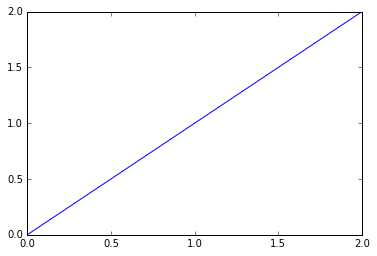

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame
import datetime
import pandas.io.data

# kilroy this needs fixing!

###############
##
## CSV file of FT-ICR mass spectrometer peak list 
##
###############
# os.chdir('C:\\Users\\etcetera...')
# os.getcwd()
# data=pandas.read_table('.\csvexample.csv')
# print data

#####################
##
## Flow Cytometer data reduction
##
#####################
# os.chdir('G:\etcetera...')
# os.getcwd()
# data=pandas.read_table('.\ct_one_day.csv')
# print data

df = DataFrame([[1, 2],[3,4],[5,6]])

a = np.arange(3.)
a

plt.plot(a)
plt.show()

## HiMAT NetCDF Explorer

In [7]:
import netCDF4
from netCDF4 import *
dir(netCDF4)

# from ._netCDF4 import *

['CompoundType',
 'Dataset',
 'Dimension',
 'EnumType',
 'Group',
 'MFDataset',
 'MFTime',
 'MINYEAR',
 'NC_DISKLESS',
 'OrderedDict',
 'VLType',
 'Variable',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__has_nc_inq_format_extended__',
 '__has_nc_inq_path__',
 '__has_rename_grp__',
 '__hdf5libversion__',
 '__name__',
 '__netcdf4libversion__',
 '__package__',
 '__path__',
 '__pdoc__',
 '__version__',
 '_netCDF4',
 'chartostring',
 'date2index',
 'date2num',
 'datetime',
 'day_units',
 'default_encoding',
 'default_fillvals',
 'getlibversion',
 'glob',
 'gregorian',
 'hr_units',
 'is_native_big',
 'is_native_little',
 'ma',
 'microsec_units',
 'millisec_units',
 'min_units',
 'netcdftime',
 'num2date',
 'numpy',
 'posixpath',
 'python3',
 'sec_units',
 'stringtoarr',
 'stringtochar',
 'sys',
 'timedelta',
 'unicode_error',
 'utils',
 'warnings',
 'weakref',
 'zip']